In [1]:
# Install Quantum Computing and ML Libraries
!pip install qiskit
!pip install scikit-learn
!pip install pandas numpy matplotlib seaborn
!pip install rdkit-pypi
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 57.1 MB/s eta 0:00:00


In [8]:
!pip install qiskit_algorithms qiskit_aer
!pip install qiskit_nature

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# 1. Synthetic Disease Data
diseases = ['Alzheimer', 'Parkinson', 'Cancer', 'Diabetes', 'Hypertension']
proteins = ['Protein_A', 'Protein_B', 'Protein_C', 'Protein_D', 'Protein_E']

# Generate 100 samples
n_samples = 100
disease_data = pd.DataFrame({
    'Disease': np.random.choice(diseases, n_samples),
    'Affected_Protein': np.random.choice(proteins, n_samples),
    'Protein_Mutation_Score': np.random.uniform(0.1, 1.0, n_samples),  # Mutation severity
    'Protein_Stability_Index': np.random.uniform(0.5, 2.0, n_samples),  # Protein stability after mutation
})

# 2. Synthetic Drug Data
drug_ids = [f'Drug_{i}' for i in range(1, n_samples+1)]

# Features: Molecular Weight, Binding Affinity, Toxicity Level
drug_data = pd.DataFrame({
    'Drug_ID': drug_ids,
    'Molecular_Weight': np.random.uniform(150, 500, n_samples),
    'Binding_Affinity': np.random.uniform(-12.0, -4.0, n_samples),  # Lower is better
    'Toxicity_Level': np.random.uniform(0.1, 0.9, n_samples),       # 0 (safe) to 1 (toxic)
})

# 3. Drug Efficacy Labels (1 = Effective, 0 = Not Effective)
# Randomly assign efficacy based on binding affinity and toxicity
conditions = (drug_data['Binding_Affinity'] < -8.0) & (drug_data['Toxicity_Level'] < 0.5)
drug_data['Efficacy'] = np.where(conditions, 1, 0)

# Merging Disease and Drug Data
combined_data = pd.concat([disease_data, drug_data], axis=1)

# Display the first few rows
combined_data.head()

,Disease,Affected_Protein,Protein_Mutation_Score,Protein_Stability_Index,Drug_ID,Molecular_Weight,Binding_Affinity,Toxicity_Level,Efficacy
0,Diabetes,Protein_D,0.985081,1.037970,Drug_1,194.975124,-6.046307,0.822521,0
1,Hypertension,Protein_A,0.458942,0.881245,Drug_2,433.921462,-6.551685,0.593811,0
2,Cancer,Protein_D,0.834789,0.942936,Drug_3,437.223817,-10.099948,0.884370,0
3,Hypertension,Protein_B,0.818511,0.983826,Drug_4,369.078885,-8.798217,0.586470,0
4,Hypertension,Protein_A,0.235646,1.773005,Drug_5,437.149395,-8.178281,0.609315,0


In [3]:
from sklearn.preprocessing import MinMaxScaler

# Select features for quantum computation
features = combined_data[['Protein_Mutation_Score', 'Protein_Stability_Index',
                           'Molecular_Weight', 'Binding_Affinity', 'Toxicity_Level']]

# Normalize the features between 0 and 1
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convert to a DataFrame for clarity
normalized_data = pd.DataFrame(normalized_features,
                               columns=features.columns)

# Add the efficacy label (target variable)
normalized_data['Efficacy'] = combined_data['Efficacy'].values

# Display the preprocessed data
normalized_data.head()

,Protein_Mutation_Score,Protein_Stability_Index,Molecular_Weight,Binding_Affinity,Toxicity_Level,Efficacy
0,0.986883,0.361910,0.093563,0.743810,0.915514,0
1,0.389243,0.254930,0.806966,0.679490,0.624878,0
2,0.816167,0.297040,0.816826,0.227900,0.994109,0
3,0.797676,0.324952,0.613371,0.393572,0.615550,0
4,0.135601,0.863646,0.816604,0.472472,0.644580,0


In [4]:
import numpy as np

# Function to encode classical data into quantum rotation angles (0 to 2π)
def angle_encoding(data):
    return data * 2 * np.pi  # Scale normalized data to 0 - 2π range

# Apply angle encoding
encoded_data = angle_encoding(normalized_data.drop('Efficacy', axis=1))

# Check encoded data
encoded_data.head()

,Protein_Mutation_Score,Protein_Stability_Index,Molecular_Weight,Binding_Affinity,Toxicity_Level
0,6.200770,2.273950,0.587876,4.673494,5.752342
1,2.445686,1.601772,5.070319,4.269361,3.926224
2,5.128126,1.866356,5.132269,1.431940,6.246174
3,5.011949,2.041731,3.853924,2.472889,3.867613
4,0.852008,5.426447,5.130872,2.968630,4.050019


In [5]:
from sklearn.model_selection import train_test_split

# Features (encoded angles) and target (efficacy)
X = encoded_data.values
y = normalized_data['Efficacy'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (80, 5)
Test set size: (20, 5)


In [15]:
# Backend: Statevector simulator
from qiskit_aer import Aer
backend = Aer.get_backend("aer_simulator_statevector")

# Estimator primitive
from qiskit.primitives import Estimator
estimator = Estimator()

# VQE solver
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal

# Variational quantum circuit (ansatz)
vqc = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz", reps=2)

# Optimizer
optimizer = COBYLA(maxiter=100)

# VQE instance
vqe = VQE(estimator, vqc, optimizer)

# Solve for the minimum eigenvalue of the Hamiltonian
from qiskit.quantum_info import SparsePauliOp
hamiltonian = SparsePauliOp.from_list([
    ("ZZ", 1.0),
    ("XX", 0.5)
])

# Run VQE
result = vqe.compute_minimum_eigenvalue(hamiltonian)

# Output the results
print("Minimum eigenvalue:", result.eigenvalue.real)
print("Optimal parameters:", result.optimal_parameters)

<ipython-input-15-fc1204dd8d45>:7: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Minimum eigenvalue: -1.4999999882189021
Optimal parameters: {ParameterVectorElement(θ[0]): 1.7681343147911568, ParameterVectorElement(θ[1]): -4.6051229001812155, ParameterVectorElement(θ[2]): 1.0796524824595204, ParameterVectorElement(θ[3]): -2.6397734770084536, ParameterVectorElement(θ[4]): -3.8338187966357955, ParameterVectorElement(θ[5]): -0.9166047519979601}


<Figure size 1000x600 with 0 Axes>

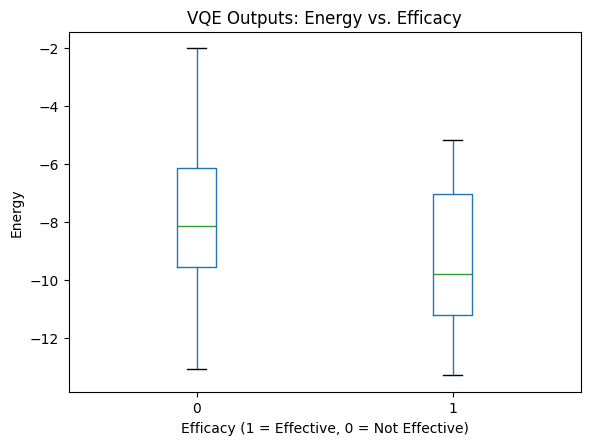

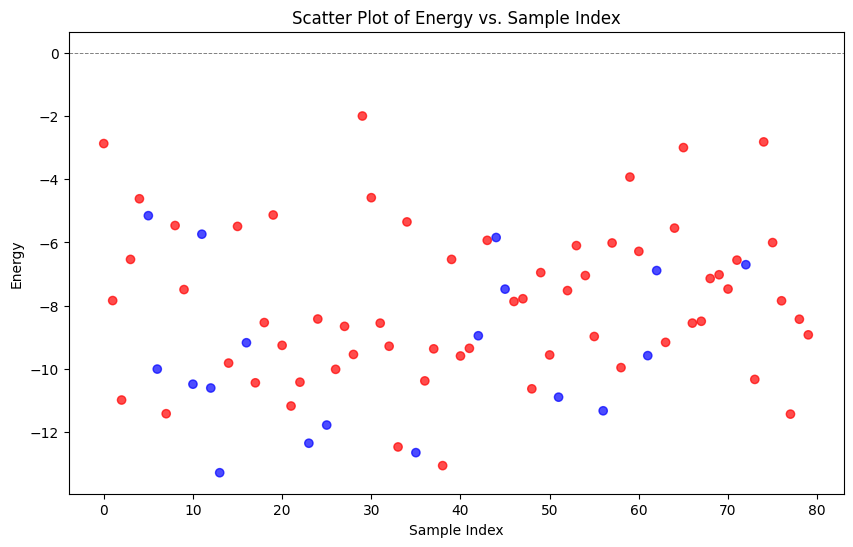

In [17]:
import numpy as np

# Ensure X_train is numeric
X_train = np.array(X_train, dtype=float)

# Store VQE outputs
energies = []
efficacy_labels = []

# Iterate through training samples
for i, sample in enumerate(X_train):
    # Create a Hamiltonian for the sample
    hamiltonian = SparsePauliOp.from_list([
        ("ZZ", 1.0 + sample[0]),  # Adjust coefficients using feature values
        ("XX", 0.5 + sample[1])
    ])

    # Run VQE to compute the minimum eigenvalue (energy)
    result = vqe.compute_minimum_eigenvalue(hamiltonian)
    energies.append(result.eigenvalue.real)
    efficacy_labels.append(y_train[i])

# Convert results into a DataFrame for easier analysis
vqe_results = pd.DataFrame({
    "Energy": energies,
    "Efficacy": efficacy_labels
})

# Plot the energy vs. efficacy
plt.figure(figsize=(10, 6))

# Box plot to visualize energy distribution by efficacy
vqe_results.boxplot(column="Energy", by="Efficacy", grid=False)
plt.title("VQE Outputs: Energy vs. Efficacy")
plt.suptitle("")  # Remove the automatic subtitle
plt.xlabel("Efficacy (1 = Effective, 0 = Not Effective)")
plt.ylabel("Energy")
plt.show()

# Scatter plot for detailed visualization
plt.figure(figsize=(10, 6))
colors = ["red" if label == 0 else "blue" for label in efficacy_labels]
plt.scatter(range(len(energies)), energies, c=colors, alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)
plt.title("Scatter Plot of Energy vs. Sample Index")
plt.xlabel("Sample Index")
plt.ylabel("Energy")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd

# Step 1: Collect VQE Energies
energies = []
efficacy_labels = []

# Ensure X_train is numeric
X_train = np.array(X_train, dtype=float)

for i, sample in enumerate(X_train):
    # Create Hamiltonian for the sample
    hamiltonian = SparsePauliOp.from_list([
        ("ZZ", 1.0 + sample[0]),  # Adjust coefficients using feature values
        ("XX", 0.5 + sample[1])
    ])

    # Run VQE to compute the minimum eigenvalue (energy)
    result = vqe.compute_minimum_eigenvalue(hamiltonian)
    energies.append(result.eigenvalue.real)
    efficacy_labels.append(y_train[i])

# Convert to a DataFrame
vqe_results = pd.DataFrame({
    "Energy": energies,
    "Efficacy": efficacy_labels
})

# Step 2: Train-Test Split for ML Model
X_ml = vqe_results[["Energy"]].values  # VQE energies as features
y_ml = vqe_results["Efficacy"].values  # Target variable

X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_ml, y_ml, test_size=0.2, random_state=42
)

# Step 3: Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_ml, y_train_ml)

# Predictions
y_pred_ml = rf.predict(X_test_ml)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test_ml, y_pred_ml))
print("Classification Report:\n", classification_report(y_test_ml, y_pred_ml))

# Step 4: Optimize VQE Parameters
# Example: Tuning the ansatz depth
optimal_depth = None
best_accuracy = 0

for depth in [1, 2, 3]:
    ansatz = TwoLocal(num_qubits=2, reps=depth, rotation_blocks=["ry", "rz"], entanglement="linear")
    vqe = VQE(estimator=estimator, ansatz=ansatz, optimizer=COBYLA(maxiter=100))

    # Recompute energies with new ansatz depth
    energies_opt = []
    for sample in X_train:
        hamiltonian = SparsePauliOp.from_list([
            ("ZZ", 1.0 + sample[0]),
            ("XX", 0.5 + sample[1])
        ])
        result = vqe.compute_minimum_eigenvalue(hamiltonian)
        energies_opt.append(result.eigenvalue.real)

    # Train ML with new energies
    X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(
        np.array(energies_opt).reshape(-1, 1), y_ml, test_size=0.2, random_state=42
    )
    rf.fit(X_train_opt, y_train_opt)
    y_pred_opt = rf.predict(X_test_opt)
    acc = accuracy_score(y_test_opt, y_pred_opt)

    print(f"Depth: {depth}, Accuracy: {acc}")

    # Update best depth
    if acc > best_accuracy:
        best_accuracy = acc
        optimal_depth = depth

print(f"Optimal Ansatz Depth: {optimal_depth}, Best Accuracy: {best_accuracy}")


Accuracy: 0.6875
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.33      0.25      0.29         4

    accuracy                           0.69        16
   macro avg       0.55      0.54      0.54        16
weighted avg       0.66      0.69      0.67        16

Depth: 1, Accuracy: 0.625
Depth: 2, Accuracy: 0.625
Depth: 3, Accuracy: 0.5625
Optimal Ansatz Depth: 1, Best Accuracy: 0.625


In [23]:
# Step 4: Predict efficacy for each drug combination
predicted_efficacy = rf.predict(X)

# Step 5: Determine readiness for pre-clinical tests
readiness_status = ["Ready for Pre-Clinical Test" if eff == 1 else "Not Ready" for eff in predicted_efficacy]

# Step 6: Display results
results = []
for i, combo in drug_data.iterrows():
    results.append({
        'Drug Combination': combo['Drug_ID'],
        'Predicted Efficacy': predicted_efficacy[i],
        'Readiness': readiness_status[i]
    })

# Convert results to DataFrame for easy viewing
final_results = pd.DataFrame(results)

# Display the final results
print(final_results)

  Drug Combination  Predicted Efficacy                    Readiness
0           Drug_1                   1  Ready for Pre-Clinical Test
1           Drug_2                   1  Ready for Pre-Clinical Test
2           Drug_3                   1  Ready for Pre-Clinical Test
3           Drug_4                   0                    Not Ready
